# Support Vector Regression

It is a Linear Regression Model with some modification, it uses epsilon ($\epsilon$) to create a Tube/Margin around the **best fit line**. This Tube/Margin allow some error for our Model to have.

![Image](https://cdn.educba.com/academy/wp-content/uploads/2020/01/SVR-chart.png)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = pd.read_csv("./Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [4]:
X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [5]:
y[:5]

array([ 45000,  50000,  60000,  80000, 110000], dtype=int64)

In [6]:
# reshape y to make it 2-D
y = y.reshape(len(y), 1)
y[:5]

array([[ 45000],
       [ 50000],
       [ 60000],
       [ 80000],
       [110000]], dtype=int64)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [8]:
X_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [9]:
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [10]:
# reshaping it to 1-D array as SVR take y as 1-D
y_scaled = y_scaled.reshape(len(y_scaled), )

## Training the SVR model

In [11]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")

regressor.fit(X_scaled, y_scaled)

SVR()

## Predicting Values

In [12]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [13]:
def predict(x):
    x = np.array(x).reshape(-1, 1)
    x_scaled = scaler_X.transform(x)
    y_predicted = regressor.predict(x_scaled)
    
    y_predicted = y_predicted.reshape(-1, 1)
    
    # Inverse the transform of scaled value
    y_predicted = scaler_y.inverse_transform(y_predicted)
    return y_predicted

In [14]:
y_p = predict(2)
y_p

array([[70786.94584626]])

## Visualizing Results

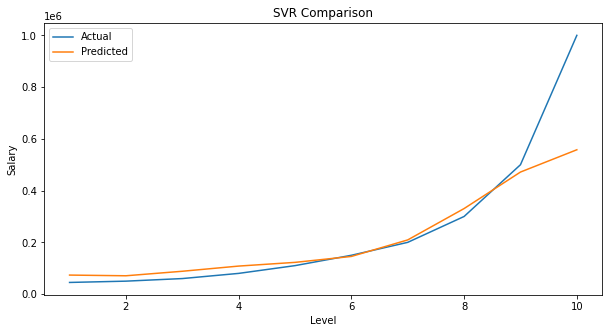

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, y)
ax.plot(X, predict(X))
ax.set(title="SVR Comparison", xlabel="Level", ylabel="Salary")
ax.legend(("Actual", "Predicted"));